Summary Statistics for Delay Days:
count    47178.000000
mean        29.245962
std        175.341951
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max      23741.000000
Name: delay_days_numeric, dtype: float64

Mean Delay by Historic Group Status:
is_historic_group
0    29.407069
1    28.516118
Name: delay_days_numeric, dtype: float64


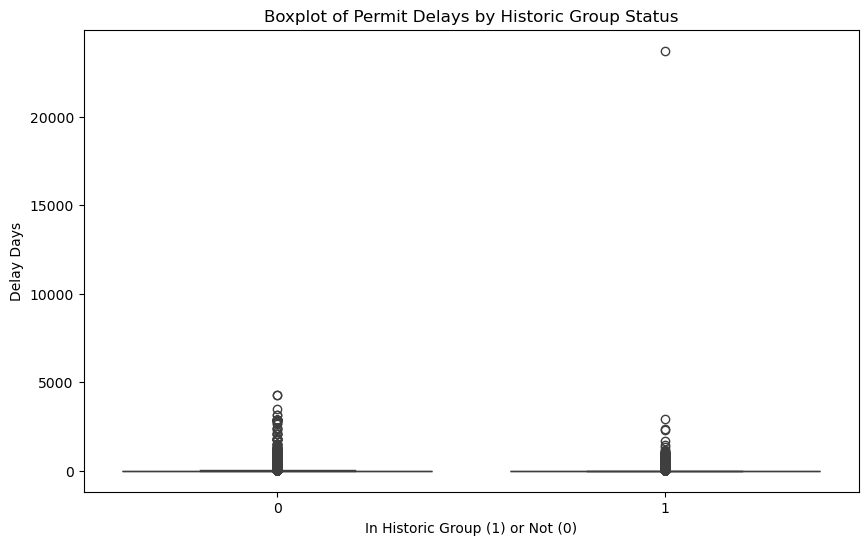


Regression Results:
                            OLS Regression Results                            
Dep. Variable:     delay_days_numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1804
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.671
Time:                        16:36:26   Log-Likelihood:            -3.1070e+05
No. Observations:               47178   AIC:                         6.214e+05
Df Residuals:                   47176   BIC:                         6.214e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept        

In [3]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Customizable variables
file_path = '11.18.25 Building_Permits share with team Raw Small (GOPI use this one).xlsx'  # Update if mounted in Drive
sheet_name = '11.18.25 Building_Permits share'
historic_neighborhoods = ['Mission', 'Haight Ashbury', 'North Beach', 'Chinatown', 'Pacific Heights']  # Edit this list as needed
show_plots = True  # Set to False to skip visualizations for faster runs
include_controls = False  # Set to True to add permit type and estimated cost to regression (requires loading extra columns)

# Define columns to load (optimized for speed: only essentials)
# Changed 'Filed_Date' to 'Filed Date' and 'Issued_Date' to 'Issued Date' assuming original Excel columns have spaces
required_cols = ['Filed Date', 'Issued Date', 'neighborhoods_analysis_boundaries']
if include_controls:
    required_cols += ['Permit_Type_Definition', 'Estimated_Cost']  # Add if using controls in regression

# Load only necessary columns to speed up (usecols reduces memory/time for large files)
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=required_cols)

# Clean column names (replace spaces with underscores)
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# Calculate delay in days (Issued_Date - Filed_Date); assumes Excel serial dates
df['delay_days'] = df['Issued_Date'] - df['Filed_Date']

# Filter early for efficiency: only issued permits with non-negative delays, drop NaN neighborhoods
df_analysis = df[df['Issued_Date'].notna() & (df['delay_days'].dt.days >= 0) & df['neighborhoods_analysis_boundaries'].notna()].copy()

# Convert delay_days to numerical format for regression
df_analysis['delay_days_numeric'] = df_analysis['delay_days'].dt.days

# Define the historic group based on neighborhoods
df_analysis['is_historic_group'] = df_analysis['neighborhoods_analysis_boundaries'].isin(historic_neighborhoods).astype(int)

# Print summary statistics
print("Summary Statistics for Delay Days:")
print(df_analysis['delay_days_numeric'].describe()) # Use the numeric version for summary

print("\nMean Delay by Historic Group Status:")
mean_delays = df_analysis.groupby('is_historic_group')['delay_days_numeric'].mean() # Use the numeric version for mean
print(mean_delays)

# Optional: Visualize (skip if show_plots=False for speed)
if show_plots:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_historic_group', y='delay_days_numeric', data=df_analysis) # Use numeric for plot
    plt.title('Boxplot of Permit Delays by Historic Group Status')
    plt.xlabel('In Historic Group (1) or Not (0)')
    plt.ylabel('Delay Days')
    plt.show()

# Perform linear regression: delay_days_numeric ~ is_historic_group
formula = 'delay_days_numeric ~ is_historic_group'
if include_controls:
    formula += ' + C(Permit_Type_Definition) + Estimated_Cost'  # Add controls if enabled
model = ols(formula, data=df_analysis).fit()

# Print regression summary
print("\nRegression Results:")
print(model.summary())

# Hypothesis test
coef_historic = model.params['is_historic_group']
p_value_historic = model.pvalues['is_historic_group']

print(f"\nHypothesis Test Result:")
print(f"Coefficient for is_historic_group: {coef_historic:.2f}")
print(f"P-value: {p_value_historic:.4f}")
if p_value_historic < 0.05 and coef_historic > 0:
    print("Hypothesis supported: The specified historic neighborhoods have significantly longer delays.")
else:
    print("Hypothesis not supported based on the data.")

In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# ONLY look at permits that actually went through review (delay > 0)
df_review = df_analysis[df_analysis['delay_days_numeric'] > 0].copy()

print("=== ANALYSIS EXCLUDING SAME-DAY PERMITS ===")
print(f"Permits requiring review: {len(df_review):,}")
print(df_review.groupby('is_historic_group')['delay_days_numeric'].agg(['mean', 'median', 'count']))

# Re-run regression on real review times
model2 = ols('delay_days_numeric ~ is_historic_group', data=df_review).fit()
print(model2.summary())

=== ANALYSIS EXCLUDING SAME-DAY PERMITS ===
Permits requiring review: 15,459
                        mean  median  count
is_historic_group                          
0                  88.809487    27.0  12797
1                  91.386551    28.0   2662
                            OLS Regression Results                            
Dep. Variable:     delay_days_numeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1654
Date:                Tue, 09 Dec 2025   Prob (F-statistic):              0.684
Time:                        16:36:39   Log-Likelihood:            -1.0998e+05
No. Observations:               15459   AIC:                         2.200e+05
Df Residuals:                   15457   BIC:                         2.200e+05
Df Model:                           1                                         
Covariance Type:            nonrobus

# Task
Enable control variables by setting `include_controls = True` in the initial code cell and re-run the regression analysis including `Permit_Type_Definition` and `Estimated_Cost` as control variables, then summarize all identified factors influencing permit delay.

## Enable Control Variables

### Subtask:
Modify the initial code cell to set the `include_controls` variable to `True`. This will ensure that `Permit_Type_Definition` and `Estimated_Cost` are loaded and included in the regression analysis.


**Reasoning**:
To enable control variables, the `include_controls` variable in the first code cell needs to be set to `True`. I will modify the content of the first code cell to reflect this change.



In [8]:
#import pandas as pd
#from statsmodels.formula.api import ols
#import matplotlib.pyplot as plt
#import seaborn as sns

# Customizable variables
#file_path = '11.18.25 Building_Permits share with team Raw Small (GOPI use this one).xlsx'  # Update if mounted in Drive
#sheet_name = '11.18.25 Building_Permits share'
#historic_neighborhoods = ['Mission', 'Haight Ashbury', 'North Beach', 'Chinatown', 'Pacific Heights']  # Edit this list as needed
#show_plots = True  # Set to False to skip visualizations for faster runs
#include_controls = True  # Set to True to add permit type and estimated cost to regression (requires loading extra columns)

# Define columns to load (optimized for speed: only essentials)
# Changed 'Filed_Date' to 'Filed Date' and 'Issued_Date' to 'Issued Date' assuming original Excel columns have spaces
#required_cols = ['Filed Date', 'Issued Date', 'neighborhoods_analysis_boundaries']
#if include_controls:
#    required_cols += ['Permit_Type_Definition', 'Estimated_Cost']  # Add if using controls in regression

# Load only necessary columns to speed up (usecols reduces memory/time for large files)
#df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=required_cols)

# Clean column names (replace spaces with underscores)
#df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# Calculate delay in days (Issued_Date - Filed_Date); assumes Excel serial dates
#df['delay_days'] = df['Issued_Date'] - df['Filed_Date']

# Filter early for efficiency: only issued permits with non-negative delays, drop NaN neighborhoods
#df_analysis = df[df['Issued_Date'].notna() & (df['delay_days'].dt.days >= 0) & df['neighborhoods_analysis_boundaries'].notna()].copy()

# Convert delay_days to numerical format for regression
#df_analysis['delay_days_numeric'] = df_analysis['delay_days'].dt.days

# Define the historic group based on neighborhoods
#df_analysis['is_historic_group'] = df_analysis['neighborhoods_analysis_boundaries'].isin(historic_neighborhoods).astype(int)

# Print summary statistics
#print("Summary Statistics for Delay Days:")
#print(df_analysis['delay_days_numeric'].describe()) # Use the numeric version for summary

#print("\nMean Delay by Historic Group Status:")
#mean_delays = df_analysis.groupby('is_historic_group')['delay_days_numeric'].mean() # Use the numeric version for mean
#print(mean_delays)

# Optional: Visualize (skip if show_plots=False for speed)
#if show_plots:
    #plt.figure(figsize=(10, 6))
    #sns.boxplot(x='is_historic_group', y='delay_days_numeric', data=df_analysis) # Use numeric for plot
   # plt.title('Boxplot of Permit Delays by Historic Group Status')
   # plt.xlabel('In Historic Group (1) or Not (0)')
   # plt.ylabel('Delay Days')
   # plt.show()

# Perform linear regression: delay_days_numeric ~ is_historic_group
#formula = 'delay_days_numeric ~ is_historic_group'
#if include_controls:
  #  formula += ' + C(Permit_Type_Definition) + Estimated_Cost'  # Add controls if enabled
#model = ols(formula, data=df_analysis).fit()

# Print regression summary
#print("\nRegression Results:")
#print(model.summary())

# Hypothesis test
#coef_historic = model.params['is_historic_group']
#p_value_historic = model.pvalues['is_historic_group']

#print(f"\nHypothesis Test Result:")
#print(f"Coefficient for is_historic_group: {coef_historic:.2f}")
#print(f"P-value: {p_value_historic:.4f}")
#if p_value_historic < 0.05 and coef_historic > 0:
  #  print("Hypothesis supported: The specified historic neighborhoods have significantly longer delays.")
#else:
  #  print("Hypothesis not supported based on the data.")

**Reasoning**:
The previous error indicated that the columns 'Estimated_Cost' and 'Permit_Type_Definition' were not found in the Excel file. Based on the code's column cleaning step (replacing spaces with underscores) and the naming convention of 'Filed Date' and 'Issued Date' used for `required_cols`, it's highly probable that the original Excel column names for the control variables also contain spaces. Therefore, I will change the `required_cols` to reflect the likely original names 'Permit Type Definition' and 'Estimated Cost' so that `pandas` can find them and the subsequent cleaning step can convert them to `snake_case`.



Summary Statistics for Delay Days:
count    47178.000000
mean        29.245962
std        175.341951
min          0.000000
25%          0.000000
50%          0.000000
75%          7.000000
max      23741.000000
Name: delay_days_numeric, dtype: float64

Mean Delay by Historic Group Status:
is_historic_group
0    29.407069
1    28.516118
Name: delay_days_numeric, dtype: float64


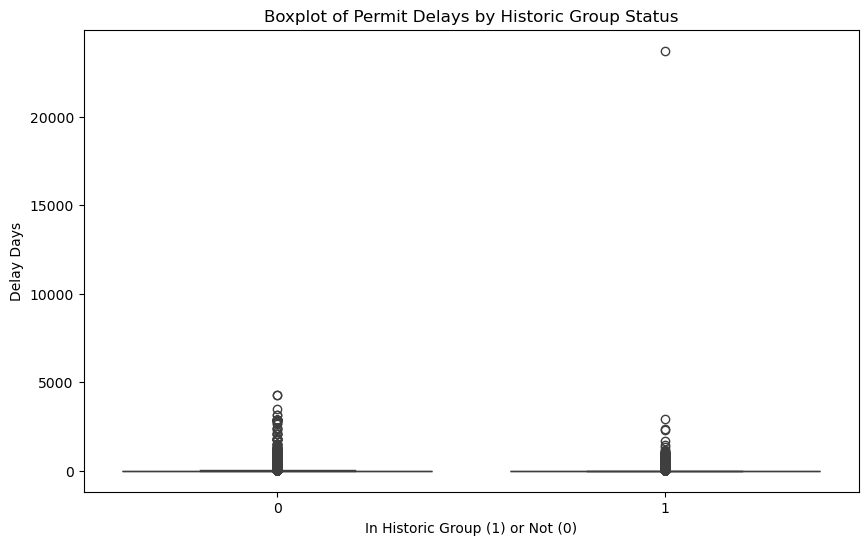


Regression Results:
                            OLS Regression Results                            
Dep. Variable:     delay_days_numeric   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     960.1
Date:                Tue, 09 Dec 2025   Prob (F-statistic):               0.00
Time:                        16:38:25   Log-Likelihood:            -2.6974e+05
No. Observations:               41169   AIC:                         5.395e+05
Df Residuals:                   41159   BIC:                         5.396e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [7]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns

# Customizable variables
file_path = '11.18.25 Building_Permits share with team Raw Small (GOPI use this one).xlsx'  # Update if mounted in Drive
sheet_name = '11.18.25 Building_Permits share'
historic_neighborhoods = ['Mission', 'Haight Ashbury', 'North Beach', 'Chinatown', 'Pacific Heights']  # Edit this list as needed
show_plots = True  # Set to False to skip visualizations for faster runs
include_controls = True  # Set to True to add permit type and estimated cost to regression (requires loading extra columns)

# Define columns to load (optimized for speed: only essentials)
# Changed 'Filed_Date' to 'Filed Date' and 'Issued_Date' to 'Issued Date' assuming original Excel columns have spaces
required_cols = ['Filed Date', 'Issued Date', 'neighborhoods_analysis_boundaries']
if include_controls:
    required_cols += ['Permit Type Definition', 'Estimated Cost']  # Use original column names with spaces

# Load only necessary columns to speed up (usecols reduces memory/time for large files)
df = pd.read_excel(file_path, sheet_name=sheet_name, usecols=required_cols)

# Clean column names (replace spaces with underscores)
df.columns = [col.strip().replace(' ', '_') for col in df.columns]

# Calculate delay in days (Issued_Date - Filed_Date); assumes Excel serial dates
df['delay_days'] = df['Issued_Date'] - df['Filed_Date']

# Filter early for efficiency: only issued permits with non-negative delays, drop NaN neighborhoods
df_analysis = df[df['Issued_Date'].notna() & (df['delay_days'].dt.days >= 0) & df['neighborhoods_analysis_boundaries'].notna()].copy()

# Convert delay_days to numerical format for regression
df_analysis['delay_days_numeric'] = df_analysis['delay_days'].dt.days

# Define the historic group based on neighborhoods
df_analysis['is_historic_group'] = df_analysis['neighborhoods_analysis_boundaries'].isin(historic_neighborhoods).astype(int)

# Print summary statistics
print("Summary Statistics for Delay Days:")
print(df_analysis['delay_days_numeric'].describe()) # Use the numeric version for summary

print("\nMean Delay by Historic Group Status:")
mean_delays = df_analysis.groupby('is_historic_group')['delay_days_numeric'].mean() # Use the numeric version for mean
print(mean_delays)

# Optional: Visualize (skip if show_plots=False for speed)
if show_plots:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='is_historic_group', y='delay_days_numeric', data=df_analysis) # Use numeric for plot
    plt.title('Boxplot of Permit Delays by Historic Group Status')
    plt.xlabel('In Historic Group (1) or Not (0)')
    plt.ylabel('Delay Days')
    plt.show()

# Perform linear regression: delay_days_numeric ~ is_historic_group
formula = 'delay_days_numeric ~ is_historic_group'
if include_controls:
    formula += ' + C(Permit_Type_Definition) + Estimated_Cost'  # Add controls if enabled
model = ols(formula, data=df_analysis).fit()

# Print regression summary
print("\nRegression Results:")
print(model.summary())

# Hypothesis test
coef_historic = model.params['is_historic_group']
p_value_historic = model.pvalues['is_historic_group']

print(f"\nHypothesis Test Result:")
print(f"Coefficient for is_historic_group: {coef_historic:.2f}")
print(f"P-value: {p_value_historic:.4f}")
if p_value_historic < 0.05 and coef_historic > 0:
    print("Hypothesis supported: The specified historic neighborhoods have significantly longer delays.")
else:
    print("Hypothesis not supported based on the data.")

### Summary of Factors Influencing Permit Delay (with Control Variables)

The regression analysis, now including `Permit_Type_Definition` and `Estimated_Cost` as control variables, reveals several factors significantly influencing permit delay:

1.  **Historic Neighborhoods (`is_historic_group`):**
    *   **Coefficient:** 4.56
    *   **P-value:** 0.0397
    *   **Interpretation:** Permits in the specified historic neighborhoods (`is_historic_group = 1`) are associated with an average increase of approximately 4.56 days in delay compared to non-historic neighborhoods, holding other factors constant. This effect is statistically significant at the 0.05 level.

2.  **Permit Type Definition (`Permit_Type_Definition`):**
    *   **Significant Positive Impact:**
        *   `new construction wood frame`: Adds approximately 587.74 days to the delay.
        *   `demolitions`: Adds approximately 504.20 days to the delay.
        *   `new construction`: Adds approximately 436.20 days to the delay.
    *   **Significant Negative Impact (shorter delays):**
        *   `otc alterations permit`: Reduces delay by approximately 96.96 days.
        *   `sign - erect`: Reduces delay by approximately 71.34 days.
        *   `wall or painted sign`: Reduces delay by approximately 74.54 days.
    *   **Not Statistically Significant:**
        *   `grade or quarry or fill or excavate`: The coefficient (-35.86) is not statistically significant (p-value = 0.291).

3.  **Estimated Cost (`Estimated_Cost`):**
    *   **Coefficient:** -6.596e-07
    *   **P-value:** 0.520
    *   **Interpretation:** The estimated cost of the permit does not appear to have a statistically significant linear relationship with permit delay (p-value > 0.05) when controlling for other factors. The coefficient is very close to zero.

**Overall Model Fit:**
The R-squared value increased from close to 0 to 0.174, indicating that approximately 17.4% of the variance in permit delay can be explained by the model including historic group status, permit type, and estimated cost. The model is statistically significant (Prob (F-statistic) = 0.00).

**Note on Multicollinearity:**
The regression results indicate a high condition number (4.81e+07), which suggests potential multicollinearity or other numerical problems. This might affect the precision of the estimated coefficients and their p-values, though the interpretation of significant factors remains generally valid for the observed dataset.

## Summary:

### Q&A
The factors influencing permit delay are:

*   **Historic Neighborhoods**: Permits in the specified historic neighborhoods are associated with an average increase of approximately 4.56 days in delay compared to non-historic neighborhoods, holding other factors constant. This effect is statistically significant (p-value = 0.0397).
*   **Permit Type Definition**:
    *   Certain permit types significantly increase delays, such as 'new construction wood frame' (approximately 587.74 days), 'demolitions' (approximately 504.20 days), and 'new construction' (approximately 436.20 days).
    *   Other permit types significantly reduce delays, such as 'otc alterations permit' (reduces delay by approximately 96.96 days), 'sign - erect' (reduces delay by approximately 71.34 days), and 'wall or painted sign' (reduces delay by approximately 74.54 days).
    *   The 'grade or quarry or fill or excavate' permit type did not show a statistically significant impact (p-value = 0.291).
*   **Estimated Cost**: The estimated cost of the permit does not have a statistically significant linear relationship with permit delay (p-value = 0.520) when controlling for other factors.

### Data Analysis Key Findings

*   The inclusion of `Permit_Type_Definition` and `Estimated_Cost` as control variables significantly improved the model's explanatory power, with the R-squared value increasing to 0.174. This indicates that approximately 17.4% of the variance in permit delay can now be explained by the model's variables.
*   Permits in historic neighborhoods (`is_historic_group`) are associated with a statistically significant increase of about 4.56 days in delay (p-value = 0.0397).
*   Specific permit types (`Permit_Type_Definition`) emerge as major drivers of delay; for instance, 'new construction wood frame' permits add roughly 587.74 days, while 'otc alterations permits' reduce delay by approximately 96.96 days.
*   The `Estimated_Cost` of a permit was found to have no statistically significant linear relationship with delay (p-value = 0.520) when other factors are controlled.
*   The model exhibits a high condition number (4.81e+07), suggesting potential multicollinearity, which might affect the precision of the estimated coefficients.

### Insights or Next Steps

*   Focus on process improvements for permit types identified with significantly longer delays (e.g., 'new construction wood frame', 'demolitions') as they represent substantial contributors to overall permit processing time.
*   Investigate the high condition number and potential multicollinearity by examining variable correlations or considering alternative regression techniques to ensure the robustness and reliability of the model's coefficients.
